In [66]:
# Timothy Fischer, g19F7919

import time

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score

seed = 42

# Initialising the dataframe to collect the results for Task 2
Model = ["Linear", "Ridge", "Lasso"]
MSE = [0,0,0]
R2 = [0,0,0]
Train = [0,0,0]
Test = [0,0,0]
Results = pd.DataFrame()


# Task 1: Linear Regression – The nice way! [3 Marks]

In [67]:
data = pd.read_csv("housingdata.csv")

housingColumns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = housingColumns

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [68]:
X = data['RM'].values.reshape(-1, 1)
y = data['MEDV'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [69]:
model = LinearRegression()

start = time.time()
model.fit(X_train, y_train)
mid = time.time()
y_pred_linear = model.predict(X_test)
finish = time.time()

MSE[0] = round(mean_squared_error(y_test, y_pred_linear), 2)
R2[0] = round(r2_score(y_test, y_pred_linear), 2)
Train[0] = (mid - start)*1000
Test[0] = (finish - mid)*1000

See line of best fit plot in the next task...

# Task 2: Regularization [20 Marks]

In [70]:
model = Ridge()

start = time.time()
model.fit(X_train, y_train)
mid = time.time()
y_pred_ridge = model.predict(X_test)
finish = time.time()

MSE[1] = round(mean_squared_error(y_test, y_pred_ridge), 2)
R2[1] = round(r2_score(y_test, y_pred_ridge), 2)
Train[1] = (mid - start)*1000
Test[1] = (finish - mid)*1000

In [71]:
model = Lasso()
 
start = time.time()
model.fit(X_train, y_train)
mid = time.time()
y_pred_lasso = model.predict(X_test)
finish = time.time()

MSE[2] = round(mean_squared_error(y_test, y_pred_lasso), 2)
R2[2] = round(r2_score(y_test, y_pred_lasso), 2)
Train[2] = (mid - start)*1000
Test[2] = (finish - mid)*1000

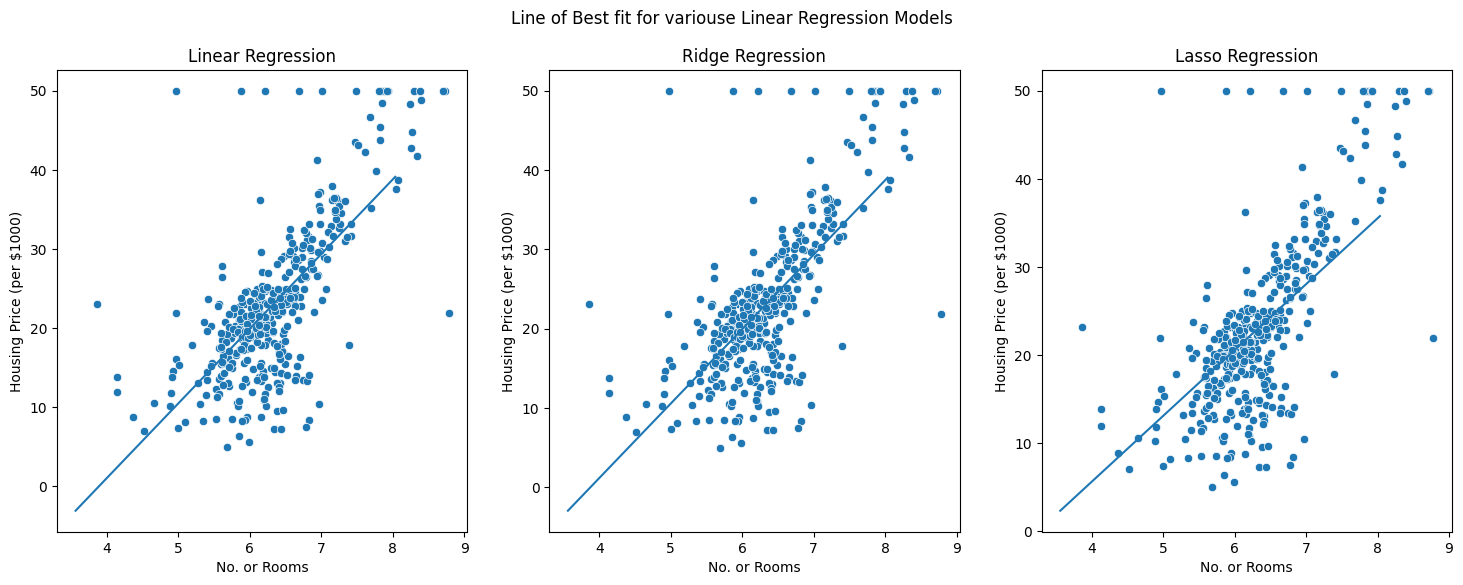

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle("Line of Best fit for variouse Linear Regression Models")
sns.scatterplot(ax=axes[0], x=X_train.flatten(), y=y_train.flatten()).set_title("Linear Regression")
sns.lineplot(ax=axes[0], x=X_test.flatten(), y=y_pred_linear.flatten())
sns.scatterplot(ax=axes[1], x=X_train.flatten(), y=y_train.flatten()).set_title("Ridge Regression")
sns.lineplot(ax=axes[1], x=X_test.flatten(), y=y_pred_ridge.flatten())
sns.scatterplot(ax=axes[2], x=X_train.flatten(), y=y_train.flatten()).set_title("Lasso Regression")
sns.lineplot(ax=axes[2], x=X_test.flatten(), y=y_pred_lasso.flatten())

for i in range(3):
    axes[i].set_xlabel("No. or Rooms")
    axes[i].set_ylabel("Housing Price (per $1000)")

In [73]:
# The timing results are a bit wonky, often get zeros.

Results['Models'] = Model
Results['MSE'] = MSE
Results['R2'] = R2
Results['Train Time (ms)'] = Train
Results['Test Time (ms)'] = Test

display(Results)

,Models,MSE,R2,Train Time (ms),Test Time (ms)
0,Linear,36.35,0.35,1.999617,0.0
1,Ridge,36.27,0.35,0.000000,0.0
2,Lasso,34.80,0.38,1.074791,0.0


### Written Answers:

b:  The Mean Squared Error as well as the R2 Error for Linear and Ridge models are about the 
    same from the results above. However, Ridge is ever so slightly smaller that Linear. 
    The R2 scores are all about the same for these two models. From the results above, I think 
    it is safe to say that these two models perform equally.

c:  We can see from the above 3 plots that the line of best fit is similar across each model.

d:  No sure if I can tell, the timings fluctuate a lot on each run.

e:  Lasso does perform better. MSE error is reduced and R2 errors are higher. This is considered
    a good thing in the context of regression analysis.

f:  

g:  Mean Absolute Error (MAE) is a better metric since it does not square the the differences. MAE treats all the errors with an equal weight.
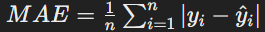

h:  The Adjusted R2 score is better since it andusts for the number of features and penalises irrelevent features.  
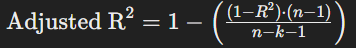

Source of research for these two questions was the Datacamp website and Towards Data science website: 

https://www.datacamp.com/tutorial/loss-function-in-machine-learning 

https://towardsdatascience.com/wth-are-r-squared-and-adjusted-r-squared-7b816eef90d9

### Question i: Rerun Task 1

In [74]:
data = pd.read_csv("housingdata.csv")
housingColumns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data.columns = housingColumns
data = data.drop(columns=['B'])

X = data['RM'].values.reshape(-1, 1)
y = data['MEDV'].values.reshape(-1, 1)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X, y, test_size=0.2, random_state=seed)

model = LinearRegression()
model.fit(X_train_new, y_train_new)
y_pred_new = model.predict(X_test_new)

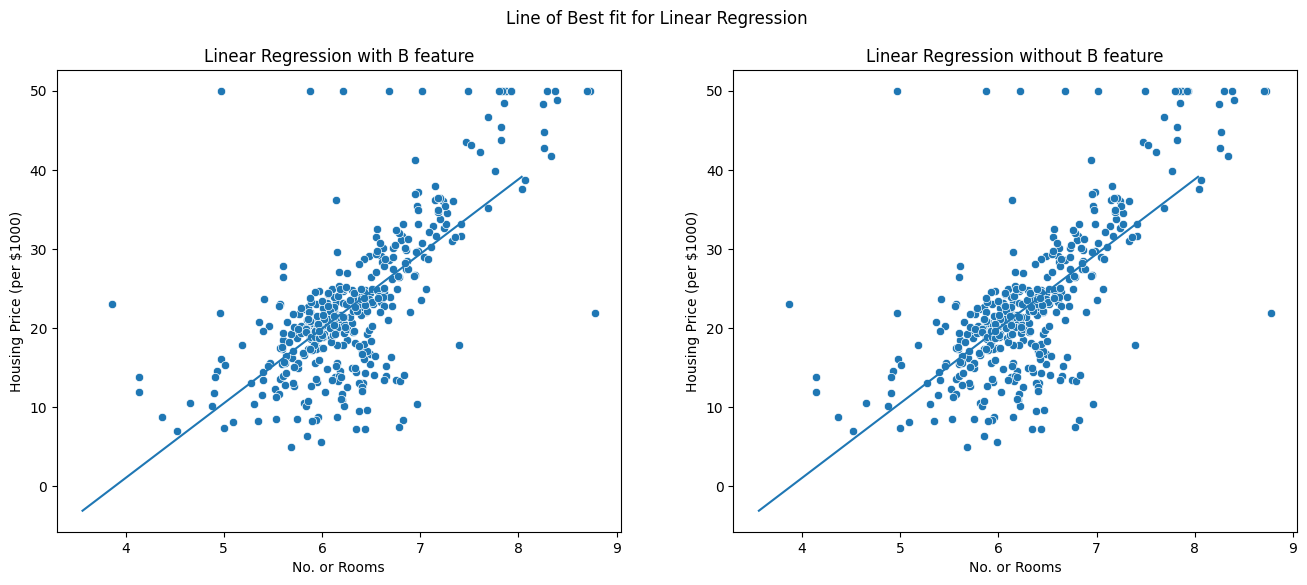

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle("Line of Best fit for Linear Regression")
sns.scatterplot(ax=axes[0], x=X_train.flatten(), y=y_train.flatten()).set_title("Linear Regression with B feature")
sns.lineplot(ax=axes[0], x=X_test.flatten(), y=y_pred_linear.flatten())
sns.scatterplot(ax=axes[1], x=X_train_new.flatten(), y=y_train_new.flatten()).set_title("Linear Regression without B feature")
sns.lineplot(ax=axes[1], x=X_test_new.flatten(), y=y_pred_new.flatten())

for i in range(2):
    axes[i].set_xlabel("No. or Rooms")
    axes[i].set_ylabel("Housing Price (per $1000)")


# Task 3: Logistic Regression as a Classifier [3 Marks]

In [76]:
iris = datasets.load_iris()


X = iris.data.astype(np.float32)
y = iris.target.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [77]:
model = LogisticRegression(max_iter=100, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [78]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Precision: {round(precision_score(y_pred, y_test, average='weighted'), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test, average='weighted'), 2)}")
print(f"F1 Score: {round(f1_score(y_pred, y_test, average='weighted'), 2)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Task 4: Scikit k-NN [3 Marks]


In [79]:
dataset = datasets.load_iris()

# slice the last 2 features (petal length and petal width)
X = dataset.data.astype(np.float32)[: ,[2,3]]
y = dataset.target.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

y_train.shape

(120,)

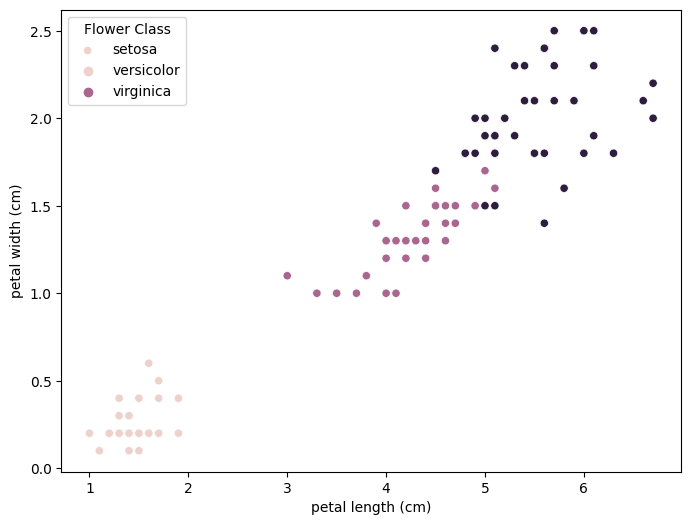

In [80]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0].flatten(), y=X_train[:, 1].flatten(), hue=y_train)
plt.legend(title="Flower Class", loc="upper left", labels=dataset.target_names)
plt.xlabel(dataset.feature_names[2])
plt.ylabel(dataset.feature_names[3])
plt.show()

The two features selected are the petal length and pertal width. we can see in the 
above plot that using these two features, the class are easy to separete.

In [81]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [82]:
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Precision: {round(precision_score(y_pred, y_test, average='weighted'), 2)}")
print(f"Recall: {round(recall_score(y_pred, y_test, average='weighted'), 2)}")
print(f"F1 Score: {round(f1_score(y_pred, y_test, average='weighted'), 2)}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


# Task 5: Logistic Again [20 Marks]

In [83]:
dataset = datasets.load_breast_cancer(as_frame=True)
X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)



## Question A

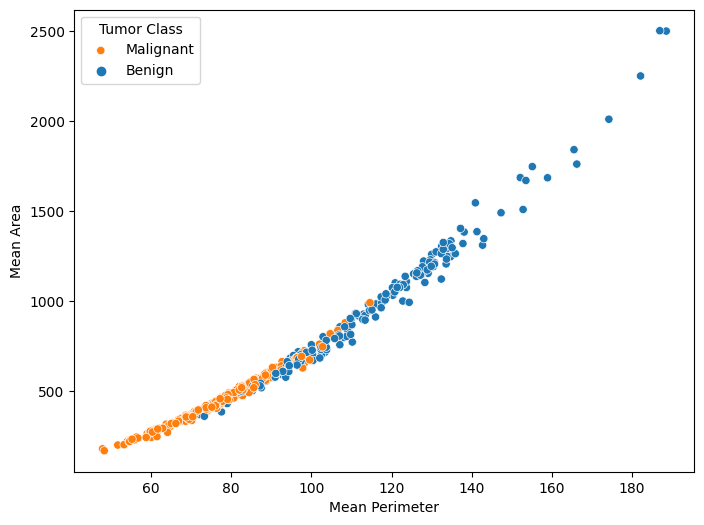

In [84]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['mean perimeter'].values, y=X_train['mean area'].values, hue=y_train)
plt.legend(["Malignant", "Benign"], loc='upper left', title="Tumor Class")
plt.xlabel("Mean Perimeter")
plt.ylabel("Mean Area")
plt.show()

## Question B

I dont think the features in (A) useful for building a model to classify breast tumours using logistic regression. It may seem like the two classes are separable at the lower and higher values but in the middle there is quite a lot of overlap and may be difficult to find a decent decision boundry.

## Question C

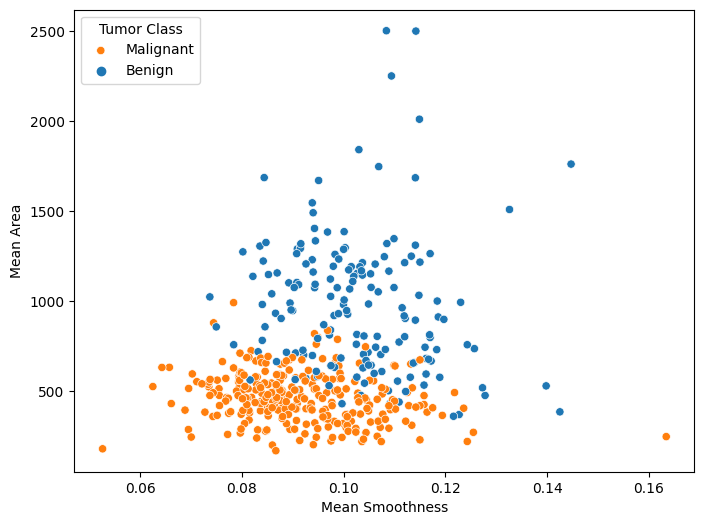

In [85]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train['mean smoothness'].values, y=X_train['mean area'].values, hue=y_train)
plt.legend(["Malignant", "Benign"], loc='upper left', title="Tumor Class")
plt.xlabel("Mean Smoothness")
plt.ylabel("Mean Area")
plt.show()

## Question D 

Yes, the features in (C) are helpful in building a model to classify breast tumors using logistic
regression. The graph above shows that the two classes are separated reasonably well, and logistic regression can find a decent decision boundary.

## Question E

<Axes: >

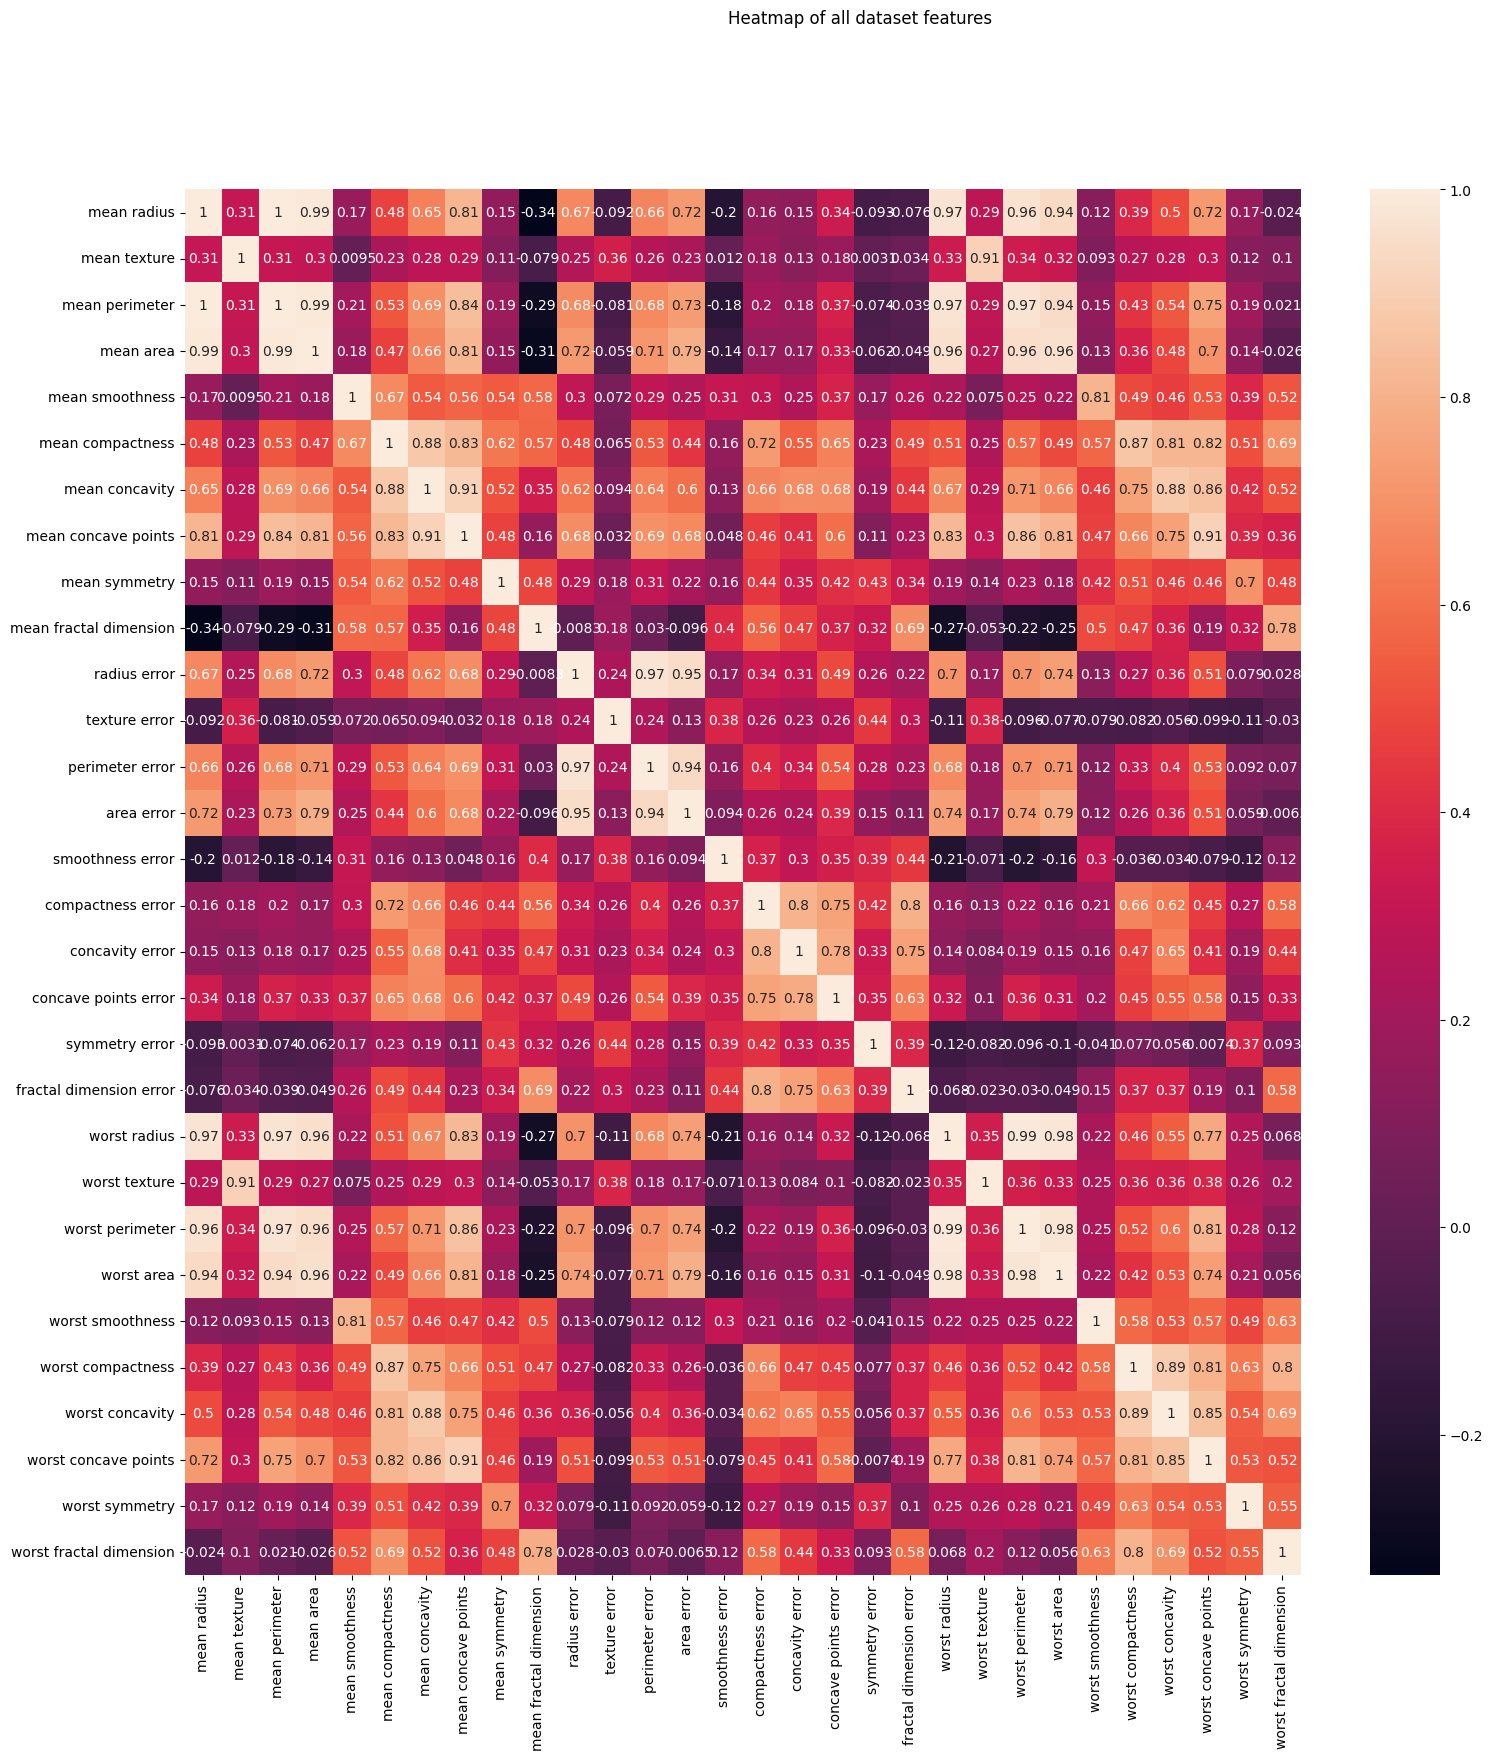

In [86]:
fig, ax = plt.subplots(figsize=(18,18))
fig.suptitle("Heatmap of all dataset features")
sns.heatmap(ax=ax, data=X_train.iloc[:,0:30].corr(), annot=True)


In [87]:
X_train.iloc[:,0:30].corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.306881,0.997850,0.986609,0.173051,0.477986,0.647311,0.812377,0.150386,-0.335575,...,0.969134,0.287590,0.963536,0.941849,0.121926,0.386325,0.496800,0.722309,0.168092,-0.024337
mean texture,0.306881,1.000000,0.313124,0.300314,0.009475,0.229954,0.282160,0.286231,0.108045,-0.079010,...,0.332908,0.909718,0.340226,0.318693,0.093301,0.274007,0.282771,0.299703,0.122984,0.102868
mean perimeter,0.997850,0.313124,1.000000,0.985985,0.210092,0.529721,0.688251,0.842081,0.185885,-0.286307,...,0.969620,0.294406,0.969674,0.943283,0.153170,0.430426,0.535560,0.751413,0.191948,0.020731
mean area,0.986609,0.300314,0.985985,1.000000,0.180709,0.471296,0.659793,0.814273,0.152679,-0.305321,...,0.960519,0.274861,0.955701,0.959723,0.127772,0.364068,0.484949,0.700435,0.144752,-0.026035
mean smoothness,0.173051,0.009475,0.210092,0.180709,1.000000,0.672342,0.536920,0.564538,0.539744,0.577171,...,0.223284,0.075452,0.251658,0.219265,0.808290,0.492527,0.458749,0.526387,0.385244,0.521392
mean compactness,0.477986,0.229954,0.529721,0.471296,0.672342,1.000000,0.877467,0.825932,0.620483,0.569638,...,0.514854,0.247127,0.573716,0.493183,0.572021,0.867774,0.813566,0.817321,0.506480,0.691960
mean concavity,0.647311,0.282160,0.688251,0.659793,0.536920,0.877467,1.000000,0.914671,0.519030,0.349280,...,0.665091,0.289986,0.710338,0.659259,0.457626,0.751516,0.884079,0.855087,0.416326,0.519451
mean concave points,0.812377,0.286231,0.842081,0.814273,0.564538,0.825932,0.914671,1.000000,0.476735,0.160184,...,0.827695,0.300338,0.855666,0.811102,0.467630,0.664415,0.748041,0.910680,0.391108,0.363804
mean symmetry,0.150386,0.108045,0.185885,0.152679,0.539744,0.620483,0.519030,0.476735,1.000000,0.482673,...,0.192004,0.138865,0.229285,0.183576,0.416854,0.508593,0.461163,0.464676,0.699251,0.476875
mean fractal dimension,-0.335575,-0.079010,-0.286307,-0.305321,0.577171,0.569638,0.349280,0.160184,0.482673,1.000000,...,-0.271858,-0.053244,-0.221453,-0.246204,0.495491,0.467774,0.364380,0.186256,0.317793,0.784537


I basically usd the correlation matrix to see which two features had as close to zero correlation, and played around with those feature pairs. The pair that seem to give the best F1 score are mean radius and are error.